In [5]:
#importing everything we need
!pip install --upgrade pip setuptools wheel
!pip install numpy
!pip install opencv-python
# !pip install pickle
# !pip install csv
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle
import random
import csv
import sys

In [6]:
path='/home/ahmad/Desktop/computer-vision-class-task/cifar-10/train'
train_data=[]
IMG_SIZE=32

csv_file_locaiton='/home/ahmad/Desktop/computer-vision-class-task/cifar-10/trainLabels.csv'

count=0
for img in tqdm(os.listdir(path)):
     img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #using grey scale to save computing power
     img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
     
     img_n=img[:-4]
     reader = csv.reader(open(csv_file_locaiton, 'r'))
     
    
     for row in reader:
         if row[0].strip() == img_n.strip():
             train_data.append([img_resized,row[1]])
             break
             
            
    
     

100%|██████████| 50000/50000 [07:20<00:00, 113.49it/s]


In [7]:
len(train_data)

50000

In [18]:
random.shuffle(train_data) # shuffleing the data 

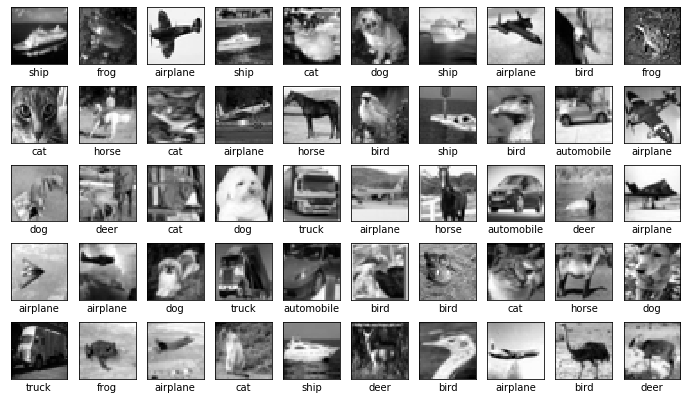

In [19]:
#ploting to show if evething is alright
plt.figure(figsize=(12,7))
for i in range(50):
    plt.subplot(5,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[i][0], cmap=plt.cm.gray)
    plt.xlabel(train_data[i][1])
    
plt.show()

In [20]:
#copying the data for safety reason
backup= train_data.copy()
backup = np.array(backup)
len(backup)
backup[1][0]


array([[ 85,  60,  76, ...,  27,  22,  25],
       [ 85,  73,  96, ...,  17,  21,  18],
       [ 83,  75, 102, ...,   9,   7,   5],
       ...,
       [100,  45,  65, ...,  13,  20,  21],
       [ 64,  56,  75, ...,   6,  21,  27],
       [ 58,  51,  78, ...,  20,  27,  38]], dtype=uint8)

In [21]:
backup[0][0] -backup[1][0] #for finding out if we are going on the right index . 

array([[ 21,  40,  27, ...,  98, 106, 142],
       [ 41,  41,  39, ..., 118, 131, 186],
       [ 34,  42,  41, ..., 145, 165, 175],
       ...,
       [179, 232, 212, ...,  11,   3,   4],
       [215, 221, 202, ...,  17,   1, 252],
       [221, 226, 199, ...,   2, 251, 240]], dtype=uint8)

In [22]:
#knn
class KNN:
    def __init__(self):
        pass
    def train(self,dataset,k=10):
        self.t=dataset
        self.k=k 
        
    def find_distance(self,validation): 
        total_distances=[]
        for v in validation:
            distances=[]
            for t in self.t:
                a=np.sum(np.abs(v[0]-t[0]))
                distances.append(a)
            total_distances.append(distances)
        return total_distances
    
    
    def find_k_prediciton(self,sorted,k):
        #print(sorted)
        final_arr=[]
        for s in sorted:
            sorted_v= s[:k]
            value = {}
            for v in sorted_v:
                if self.t[v][1] in value:
                    value[self.t[v][1]]= value[self.t[v][1]]+1
                else:
                    value[self.t[v][1]]= 1
            # print(value)
            final_arr.append(max(value, key= lambda x: value[x]) )
        return final_arr

    def find_accuracy(self,actual,preditions):
        result=[]
        for i,v in enumerate(actual):
            result.append(int(actual[i]==preditions[i]))    
        # print(result)
        return np.mean(result)


    def predict(self, validation):
        distances=self.find_distance(validation)
        arg_min=[np.argmin(d) for d in distances]
        preditions=[self.t[a][1] for a in arg_min]
        #test_prdiction=[np.argpartition(a, 1) for a in distances]
        sorted_values=[np.argsort(a) for a in distances] # all the k value is made from this one , more optimized than running this separately 
        # print("helo")
        # print(test_prdiction)
        preditions_one=[self.t[a[:2][0]][1] for a in sorted_values]
        actual=[ v[1] for v in validation]
        
        values={}

        for k in tqdm(range(1,self.k+1)):
            preditions_two =self.find_k_prediciton(sorted_values,k)
            values[k]=self.find_accuracy(actual,preditions_two)

        

        # preditions_two =self.find_k_prediciton(sorted_values,5)

        # print(preditions)
        # print(preditions_one)
        # print(preditions_two)
        
        
        # for vac in sorted_values:
        # print(preditions)
        # print(preditions_one)
        # print("whats going on")

        # print(arg_min)
        # print(preditions)
        # print(actual)
        # result=[]
        # for i,v in enumerate(actual):
        #     result.append(int(actual[i]==preditions[i]))    
        # # print(result)
        # print(np.mean(result))
        return values
        

        
                
        


In [23]:
def add_array(one,two):
    arr=[]
    for a in one:
        arr.append(a)
    for b in two:
        arr.append(b)
    return arr

In [24]:
knn=KNN()

final_val=[]

#first fold
knn.train(backup[:40000])
final_val.append(knn.predict(backup[40000:50000]))

#second fold
knn.train(add_array(backup[:30000],backup[40000:50000]))
final_val.append(knn.predict(backup[30000:40000]))

#third fold
knn.train(add_array(backup[:20000],backup[30000:50000]))
final_val.append(knn.predict(backup[20000:30000]))

#fourth fold
knn.train(add_array(backup[:20000],backup[30000:50000]))
final_val.append(knn.predict(backup[20000:30000]))

#fifth fold 
knn.train(backup[10000:50000])
final_val.append(knn.predict(backup[:10000]))


print(final_val)





100%|██████████| 10/10 [00:00<00:00, 196.79it/s][{1: 0.182, 2: 0.182, 3: 0.193, 4: 0.187, 5: 0.193, 6: 0.188, 7: 0.192, 8: 0.191, 9: 0.188, 10: 0.186}, {1: 0.198, 2: 0.198, 3: 0.199, 4: 0.209, 5: 0.201, 6: 0.205, 7: 0.207, 8: 0.213, 9: 0.208, 10: 0.216}, {1: 0.187, 2: 0.187, 3: 0.194, 4: 0.208, 5: 0.214, 6: 0.208, 7: 0.211, 8: 0.219, 9: 0.222, 10: 0.218}, {1: 0.187, 2: 0.187, 3: 0.194, 4: 0.208, 5: 0.214, 6: 0.208, 7: 0.211, 8: 0.219, 9: 0.222, 10: 0.218}, {1: 0.194, 2: 0.194, 3: 0.207, 4: 0.206, 5: 0.201, 6: 0.204, 7: 0.204, 8: 0.207, 9: 0.207, 10: 0.202}]



In [26]:
#this is only 5000 image result , my pc keeps freezing if i do more than tha
val_in_format={a:[] for a in range(1,11)  }
# print(val_in_format)

for a in final_val:
    for k,v in a.items():
        val_in_format[k].append(v)

print(val_in_format)

{1: [0.182, 0.198, 0.187, 0.187, 0.194], 2: [0.182, 0.198, 0.187, 0.187, 0.194], 3: [0.193, 0.199, 0.194, 0.194, 0.207], 4: [0.187, 0.209, 0.208, 0.208, 0.206], 5: [0.193, 0.201, 0.214, 0.214, 0.201], 6: [0.188, 0.205, 0.208, 0.208, 0.204], 7: [0.192, 0.207, 0.211, 0.211, 0.204], 8: [0.191, 0.213, 0.219, 0.219, 0.207], 9: [0.188, 0.208, 0.222, 0.222, 0.207], 10: [0.186, 0.216, 0.218, 0.218, 0.202]}


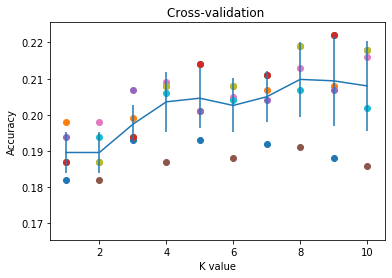

In [27]:
res=val_in_format
for k,v in val_in_format.items():
    for a in v:
        plt.scatter(k,a)


mean = np.array([np.mean(v) for k, v in sorted(res.items())])
std = np.array([np.std(v) for k, v in sorted(res.items())])
plt.errorbar([k for k, v in sorted(res.items())], mean, yerr=std)
plt.title('Cross-validation ')
plt.xlabel("K value")
plt.ylabel("Accuracy")

plt.show()